In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("dataset")
df = df.drop(['Unnamed: 0'], axis = 1)

In [3]:
df = df.sample(frac=1).reset_index(drop=True)
#df = df.replace({'noise':'other', 'clap':'other', 'knock':'other'})
df.head(10)

,label,attack_time,lat,slope,ste,zcr,length_of_low,length_of_high
0,step,72,1.857332,151476.684570,1.821737e+06,698,748,12052
1,knock,44,1.643453,437771.484375,6.487436e+06,826,397,12403
2,step,67,1.826075,108438.571304,1.298642e+06,693,781,12019
3,clap,30,1.477121,210559.033203,9.876324e+04,935,6978,5822
4,step,114,2.056905,64088.683011,9.869711e+05,672,859,11941
5,clap,203,2.307496,3660.545312,1.360950e+04,1004,7762,5038
6,knock,49,1.690196,72049.615354,5.413675e+04,855,5675,7125
7,step,94,1.973128,75298.381400,1.003113e+06,735,850,11950
8,step,71,1.851258,146130.488006,1.579280e+06,760,760,12040
9,clap,61,1.785330,20002.441406,2.537886e+04,1029,7668,5132


In [4]:
df.describe()

,attack_time,lat,slope,ste,zcr,length_of_low,length_of_high
count,486.00000,486.000000,4.860000e+02,4.860000e+02,486.000000,486.000000,486.000000
mean,128.67284,1.867169,1.573403e+05,1.229078e+06,842.294239,2728.364198,10071.611111
std,507.77733,0.352749,2.067860e+05,2.061639e+06,198.626858,2506.481316,2506.462665
min,8.00000,0.903090,8.661145e+02,1.263371e+04,357.000000,310.000000,4867.000000
25%,47.00000,1.672098,4.610108e+04,9.062196e+04,713.250000,816.250000,7123.500000
50%,68.00000,1.832509,9.200809e+04,9.251062e+05,777.000000,1037.000000,11763.000000
75%,112.00000,2.049218,1.805730e+05,1.489945e+06,911.000000,5676.500000,11983.750000
max,9829.00000,3.992509,1.846677e+06,3.004631e+07,1839.000000,7933.000000,12490.000000


In [5]:
df = df.drop(df[df.attack_time > 2000].index, inplace = False)
df = df.drop(df[df.slope > 900000].index, inplace = False)
df = df.drop(df[df.ste > 6000000].index, inplace = False)
df = df.drop(df[df.length_of_high > 12500].index, inplace = False)
df = df.drop(df[df.attack_time < 10].index, inplace = False)
df = df.drop(df[df.slope < 2000].index, inplace = False)


In [6]:
df.describe()

,attack_time,lat,slope,ste,zcr,length_of_low,length_of_high
count,455.000000,455.000000,455.000000,4.550000e+02,455.000000,455.000000,455.000000
mean,94.512088,1.856187,136733.884323,8.958488e+05,841.589011,2815.331868,9984.641758
std,87.164179,0.306304,135511.444851,9.257223e+05,194.054662,2503.545942,2503.525076
min,12.000000,1.079181,2012.903914,1.263371e+04,357.000000,310.000000,4867.000000
25%,47.000000,1.672098,45497.761737,8.506303e+04,713.000000,839.000000,7084.500000
50%,67.000000,1.826075,90415.288398,8.699814e+05,777.000000,1074.000000,11726.000000
75%,106.000000,2.025306,173183.640544,1.371517e+06,920.500000,5715.500000,11961.000000
max,688.000000,2.837588,762771.891276,5.577913e+06,1554.000000,7933.000000,12490.000000


In [33]:
X = df[['attack_time','lat','slope','zcr', 'length_of_high', 'length_of_low']]
y = df['label'] 

In [34]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state = 40)

In [35]:
clf = svm.SVC(kernel='linear', gamma = 0.002)

In [36]:
clf.fit(X_train, y_train)

SVC(gamma=0.002, kernel='linear')

In [37]:
y_pred = clf.predict(x_test)

In [38]:
y_test.value_counts()

label
step     84
clap     36
knock    30
noise    10
Name: count, dtype: int64

In [39]:
import matplotlib.pyplot as plt

Accuracy: 87.5
              precision    recall  f1-score   support

        clap       0.97      1.00      0.99        36
       knock       0.74      0.87      0.80        30
       noise       0.80      0.40      0.53        10
        step       0.89      0.88      0.89        84

    accuracy                           0.88       160
   macro avg       0.85      0.79      0.80       160
weighted avg       0.88      0.88      0.87       160



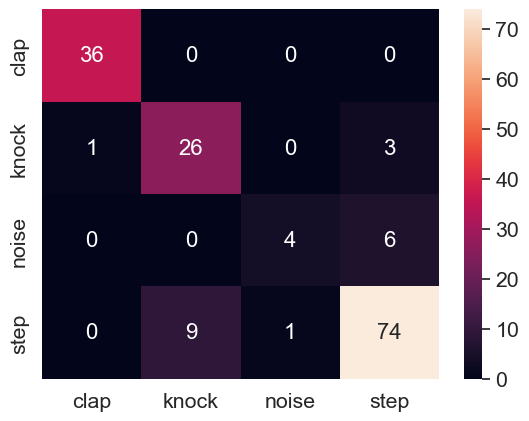

In [40]:
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred)*100,2))
print(metrics.classification_report(y_test, y_pred, digits=2))
sn.set(font_scale=1.4) # for label size
sn.heatmap(confusion_matrix(y_test, y_pred),xticklabels=['clap', 'knock', 'noise', 'step'], yticklabels=['clap', 'knock', 'noise', 'step'], annot=True, annot_kws={"size": 16})# font size
plt.show()

In [15]:
clf.fit(X, y)

SVC(gamma=0.002, kernel='linear')

In [16]:
from micromlgen import port
labels = {
        0: 'clap',
        1: 'knock',
        2: 'noise',
        3: 'step',
    }
with open('svm.h', 'w') as f:
    f.write(port(clf, classmap=labels))

In [17]:
y_pred2 = clf.predict(x_test)

Accuracy: 90.0
Precision: 88.34
Recall: 84.29


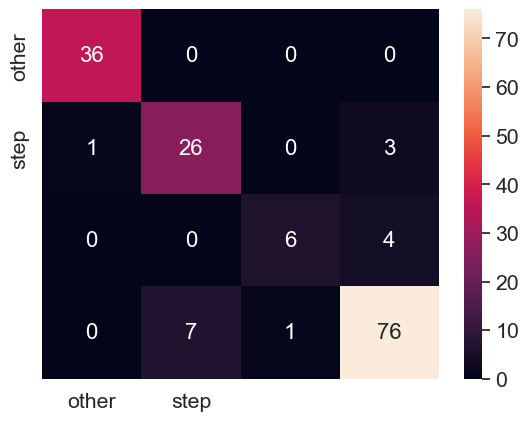

In [18]:
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred2)*100,2))
print("Precision:",round(metrics.precision_score(y_test, y_pred2,average='macro')*100,2))
print("Recall:",round(metrics.recall_score(y_test, y_pred2,average='macro')*100,2))
sn.set(font_scale=1.4) # for label size
sn.heatmap(confusion_matrix(y_test, y_pred2),xticklabels=['other', 'step'], yticklabels=['other', 'step'], annot=True, annot_kws={"size": 16})# font size
plt.show()

In [19]:
from IPython.display import Audio
import librosa

In [20]:
step, sr = librosa.load(r"C:/Users/valer/Desktop/THESIS/my_data_fromHAMK/steps/2.wav" , sr = 16000, duration = 0.8)
step*=10000

In [21]:
Audio(data=step, rate=sr)

In [22]:
y_real = 41


<AxesSubplot: >

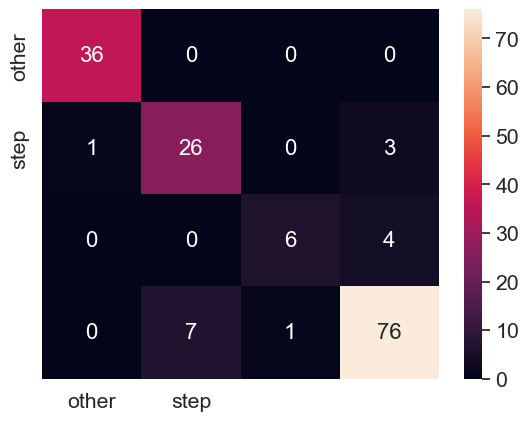

In [23]:
sn.heatmap(confusion_matrix(y_test, y_pred2),xticklabels=['other', 'step'], yticklabels=['other', 'step'], annot=True, annot_kws={"size": 16})# font size